In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("2012-18_playerBoxScore.csv")

C:\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"

Bad key "text.kerning_factor" on line 4 in
C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5,5,2,7,CLE,East,Central,Home,Win,0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,1.0,0,3,3,CLE,East,Central,Home,Win,0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0.0,1,0,1,CLE,East,Central,Home,Win,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155708,2018-04-11,10:30,Regular,Sampson,JaKarr,SAC,West,Pacific,Home,Win,...,1.0,0,4,4,HOU,West,Southwest,Away,Loss,1
155709,2018-04-11,10:30,Regular,Hield,Chavano,SAC,West,Pacific,Home,Win,...,0.0,2,3,5,HOU,West,Southwest,Away,Loss,1
155710,2018-04-11,10:30,Regular,Hayes,Nigel,SAC,West,Pacific,Home,Win,...,0.0,1,3,4,HOU,West,Southwest,Away,Loss,1
155711,2018-04-11,10:30,Regular,Carter,Vincent,SAC,West,Pacific,Home,Win,...,0.0,0,3,3,HOU,West,Southwest,Away,Loss,1


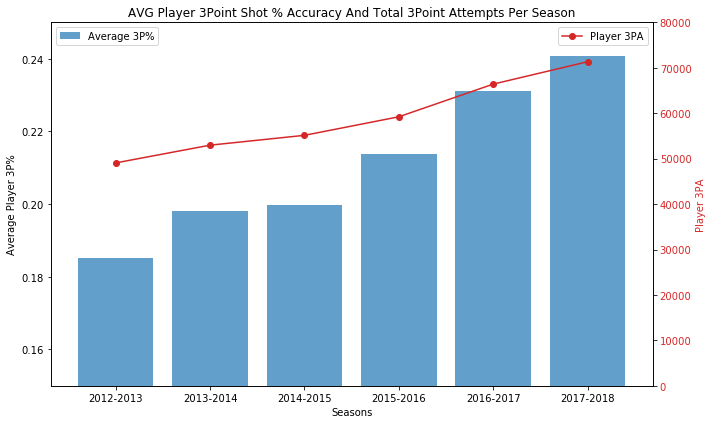

In [11]:
# Convert 'gmDate' to datetime
data['gmDate'] = pd.to_datetime(data['gmDate'])

if data['gmDate'].isna().sum() > 0:
    print("Warning: Missing values in gmDate column.")

# Define the season bins using a case statement
data['Season'] = pd.cut(
    data['gmDate'],
    bins=[
        pd.to_datetime('2012-10-01'),
        pd.to_datetime('2013-08-01'),
        pd.to_datetime('2014-08-01'),
        pd.to_datetime('2015-08-01'),
        pd.to_datetime('2016-08-01'),
        pd.to_datetime('2017-08-01'),
        pd.to_datetime('2018-08-01')
    ],
    labels=[
        '2012-2013',
        '2013-2014',
        '2014-2015',
        '2015-2016',
        '2016-2017',
        '2017-2018'
    ],
    right=False
)

# Convert Season to string and play3PA to numeric
season_stats['Season'] = season_stats['Season'].astype(str)
season_stats['play3PA'] = pd.to_numeric(season_stats['play3PA'], errors='coerce')


# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the average player 3P%
ax1.bar(season_stats['Season'], season_stats['play3P%'], color='tab:blue', alpha=0.7, label='Average 3P%')
ax1.set_xlabel('Seasons')
ax1.set_ylabel('Average Player 3P%')
ax1.set_ylim(0.15, 0.25)
ax1.legend(loc='upper left')

# Creating a second y-axis for the player 3PA
ax2 = ax1.twinx()
ax2.plot(season_stats['Season'], season_stats['play3PA'], color='tab:red', marker='o', label='Player 3PA')
ax2.set_ylabel('Player 3PA', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 80000)
ax2.legend(loc='upper right')

# Set the title
plt.title('AVG Player 3Point Shot % Accuracy And Total 3Point Attempts Per Season')

# Show the plot
plt.tight_layout()
plt.show()

Ignoring Free Throws, the usage of 3Point shots grew 9.4% between the '12-'13 and the '17-'18 season.`

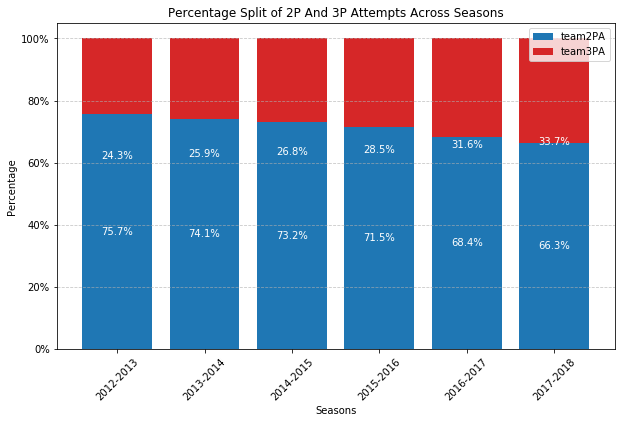

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data = pd.read_csv("2012-18_teamBoxScore.csv")

# Convert 'gmDate' to datetime
data['gmDate'] = pd.to_datetime(data['gmDate'])

# Define the season bins using a case statement
data['Season'] = pd.Series(
    np.select(
        [
            (data['gmDate'] >= '2012-10-01') & (data['gmDate'] < '2013-08-01'),
            (data['gmDate'] >= '2013-10-01') & (data['gmDate'] < '2014-08-01'),
            (data['gmDate'] >= '2014-10-01') & (data['gmDate'] < '2015-08-01'),
            (data['gmDate'] >= '2015-10-01') & (data['gmDate'] < '2016-08-01'),
            (data['gmDate'] >= '2016-10-01') & (data['gmDate'] < '2017-08-01'),
            (data['gmDate'] >= '2017-10-01') & (data['gmDate'] < '2018-08-01')
        ],
        [
            '2012-2013',
            '2013-2014',
            '2014-2015',
            '2015-2016',
            '2016-2017',
            '2017-2018'
        ],
        default=None
    )
)

# Calculate the total team2PA and team3PA for each season
season_totals = data.groupby('Season')[['team2PA', 'team3PA']].sum()

# Calculate the percentage split of team2PA and team3PA across seasons
season_perc = season_totals.div(season_totals.sum(axis=1), axis=0) * 100

# Plotting the data as a 100% stacked bar chart
plt.figure(figsize=(10, 6))
p1 = plt.bar(season_perc.index, season_perc['team2PA'], color='tab:blue', label='team2PA')
p2 = plt.bar(season_perc.index, season_perc['team3PA'], bottom=season_perc['team2PA'], color='tab:red', label='team3PA')
plt.xlabel('Seasons')
plt.ylabel('Percentage')
plt.title('Percentage Split of 2P And 3P Attempts Across Seasons')
plt.legend((p1[0], p2[0]), ('team2PA', 'team3PA'))

# Add labels for each bar indicating the percentage split
for index, value in enumerate(season_perc['team2PA']):
    plt.text(index, value/2, f'{value:.1f}%', ha='center', va='center', color='white')

for index, value in enumerate(season_perc['team3PA']):
    plt.text(index, value + season_perc['team2PA'][index]/2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-14-7d9164d1b0b3>:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(season_stats['Season'], season_stats['teamPTS'], linefmt='tab:blue', markerfmt='bo', basefmt=' ')


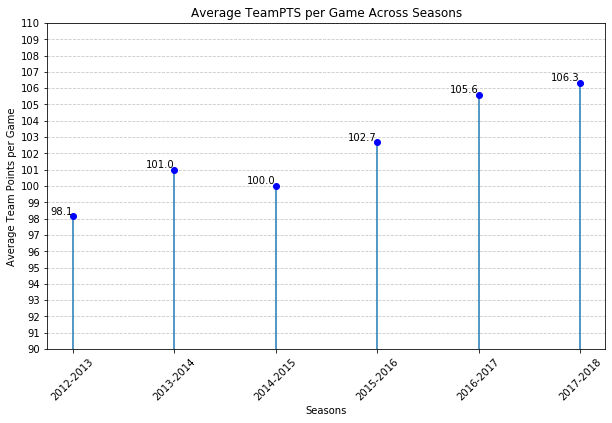

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data = pd.read_csv("2012-18_teamBoxScore.csv")

# Convert 'gmDate' to datetime
data['gmDate'] = pd.to_datetime(data['gmDate'])

# Define the season bins using a case statement
data['Season'] = pd.Series(
    np.select(
        [
            (data['gmDate'] >= '2012-10-01') & (data['gmDate'] < '2013-08-01'),
            (data['gmDate'] >= '2013-10-01') & (data['gmDate'] < '2014-08-01'),
            (data['gmDate'] >= '2014-10-01') & (data['gmDate'] < '2015-08-01'),
            (data['gmDate'] >= '2015-10-01') & (data['gmDate'] < '2016-08-01'),
            (data['gmDate'] >= '2016-10-01') & (data['gmDate'] < '2017-08-01'),
            (data['gmDate'] >= '2017-10-01') & (data['gmDate'] < '2018-08-01')
        ],
        [
            '2012-2013',
            '2013-2014',
            '2014-2015',
            '2015-2016',
            '2016-2017',
            '2017-2018'
        ],
        default=None
    )
)

# Calculate average teamPTS per game for each season
season_stats = data.groupby('Season')['teamPTS'].mean().reset_index()

# Sort the DataFrame by season in ascending order
season_stats = season_stats.sort_values(by='Season', ascending=True)

# Plotting the data as a lollipop chart
plt.figure(figsize=(10, 6))
plt.stem(season_stats['Season'], season_stats['teamPTS'], linefmt='tab:blue', markerfmt='bo', basefmt=' ')

# Add labels for each data point
for index, value in enumerate(season_stats['teamPTS']):
    plt.text(season_stats['Season'][index], value, f'{value:.1f}', ha='right', va='bottom')

plt.xlabel('Seasons')
plt.ylabel('Average Team Points per Game')
plt.title('Average TeamPTS per Game Across Seasons')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Set the y-axis limits and ticks
plt.ylim(90, 110)
plt.yticks(np.arange(90, 111, 1))

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

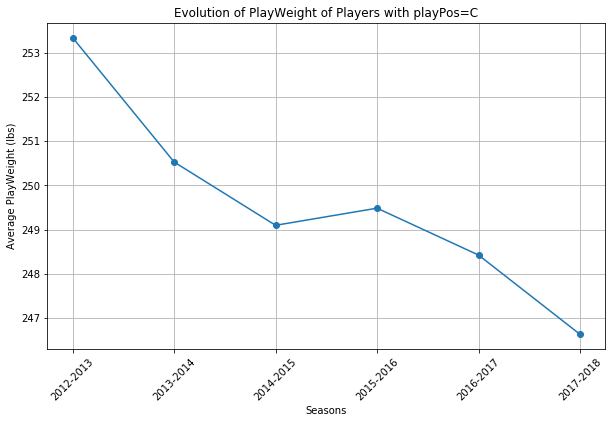

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("2012-18_playerBoxScore.csv")

# Convert 'gmDate' to datetime
data['gmDate'] = pd.to_datetime(data['gmDate'])

# Define the season bins
data['Season'] = pd.cut(
    data['gmDate'],
    bins=[
        pd.to_datetime('2012-10-01'),
        pd.to_datetime('2013-08-01'),
        pd.to_datetime('2014-08-01'),
        pd.to_datetime('2015-08-01'),
        pd.to_datetime('2016-08-01'),
        pd.to_datetime('2017-08-01'),
        pd.to_datetime('2018-08-01')
    ],
    labels=[
        '2012-2013',
        '2013-2014',
        '2014-2015',
        '2015-2016',
        '2016-2017',
        '2017-2018'
    ],
    right=False
)

# Filter data for players with "playPos" = C
center_data = data[data['playPos'] == 'C']

# Group by Season and calculate the mean playWeight for each season
center_weight_stats = center_data.groupby('Season')['playWeight'].mean().reset_index()

# Convert Season to string and playWeight to numeric
center_weight_stats['Season'] = center_weight_stats['Season'].astype(str)
center_weight_stats['playWeight'] = pd.to_numeric(center_weight_stats['playWeight'], errors='coerce')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(center_weight_stats['Season'], center_weight_stats['playWeight'], marker='o', color='tab:blue')
plt.xlabel('Seasons')
plt.ylabel('Average PlayWeight (lbs)')
plt.title('Evolution of PlayWeight of Players with playPos=C')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Higher 3P Accuracy is positively correlated with the number of wins
The better the team's 3P% Accuracy, the greater number of victories.

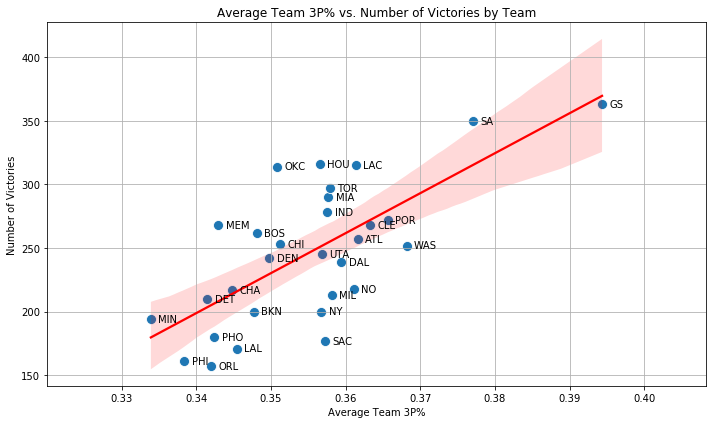

In [20]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the warning
warnings.filterwarnings("ignore", message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy")

# Read the CSV file
file_path = '2012-18_teamBoxScore.csv'
df = pd.read_csv(file_path)

# Calculate the average team 3P% and the number of victories by teamAbbr
avg_team3P = df.groupby('teamAbbr')['team3P%'].mean()
num_victories = df[df['teamRslt'] == 'Win'].groupby('teamAbbr').size()

# Create a new DataFrame with the calculated values
data = pd.DataFrame({'Average Team 3P%': avg_team3P, 'Number of Victories': num_victories})

# Create the scatterplot with labels
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Average Team 3P%', y='Number of Victories', data=data, s=100)

# Add text labels to the points
for team, row in data.iterrows():
    ax.text(row['Average Team 3P%'] + 0.001, row['Number of Victories'], team, ha='left', va='center')

# Add labels and title
plt.xlabel('Average Team 3P%')
plt.ylabel('Number of Victories')
plt.title('Average Team 3P% vs. Number of Victories by Team')

# Add a trend line
sns.regplot(x='Average Team 3P%', y='Number of Victories', data=data, scatter=False, color='red')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()